In [1]:
from mpasanalysis import *
import e3sm_res_cmp
%matplotlib inline

In [2]:
# get paths of restart files, monthly mean output files, processed climatology files and output figures
ts_ys = 1
ts_ye = 20
plt_ys = 20
plt_ye = 20
data_root = e3sm_res_cmp.load_paths_ocn(climo_ys=ts_ys, climo_ye=ts_ye,
                                        ts_ys=ts_ys, ts_ye=ts_ye, runname='gl-mesh')
# ts_ys = 1
# ts_ye = 50
# plt_ys = 50
# plt_ye = 50
# data_root = e3sm_res_cmp.load_paths_ocn(climo_ys=ts_ys, climo_ye=ts_ye,
#                                         ts_ys=ts_ys, ts_ye=ts_ye)

# ts_ys = 1
# ts_ye = 55
# plt_ys = 55
# plt_ye = 55
# data_root = e3sm_res_cmp.load_paths_ocn(climo_ys=ts_ys, climo_ye=ts_ye,
#                                         ts_ys=ts_ys, ts_ye=ts_ye, runname='high-res')
rst_root = data_root['rst_root']
climo_root = data_root['climo_root']
mon_root = data_root['mon_root']
fig_root = data_root['fig_root']
rst_file = rst_root+'/mpaso.rst.{:04d}-01-01_00000.nc'.format(ts_ye+1)

Running on machine pn1803144.lanl.gov


In [3]:
# load dataset
mpasmesh = MPASMesh(filepath=rst_file)
mpasdata = MPASOData(filepath=rst_file, filepath_mesh=rst_file)

### Test 1: Get path between two end points 

#### Step 1: Show the path 

Endpoints:
    P0: 304.5 53.5
    P1: 312.0 61.0
    P2: 321.0 51.0
Vertex closest to P0: 311.97226 61.00867
Vertex closest to P1: 304.51258 53.43281
 - Vertex closest to RefP1: 310.50961 59.82485
 - Vertex closest to RefP2: 309.05256 58.57727
 - Vertex closest to RefP3: 307.79638 57.30978
 - Vertex closest to RefP4: 306.63237 56.02556
 - Vertex closest to RefP5: 305.54080 54.73217
Vertex closest to P0: 320.81223 51.02010
Vertex closest to P1: 311.97226 61.00867
 - Vertex closest to RefP1: 319.72608 52.71921
 - Vertex closest to RefP2: 318.28389 54.50534
 - Vertex closest to RefP3: 317.02964 56.06637
 - Vertex closest to RefP4: 315.50148 57.75534
 - Vertex closest to RefP5: 313.82713 59.41674
Vertex closest to P0: 320.81223 51.02010
Vertex closest to P1: 304.51258 53.43281
 - Vertex closest to RefP1: 318.31093 51.56055
 - Vertex closest to RefP2: 315.53223 52.11873
 - Vertex closest to RefP3: 312.88233 52.60081
 - Vertex closest to RefP4: 310.06970 52.88824
 - Vertex closest to RefP5: 

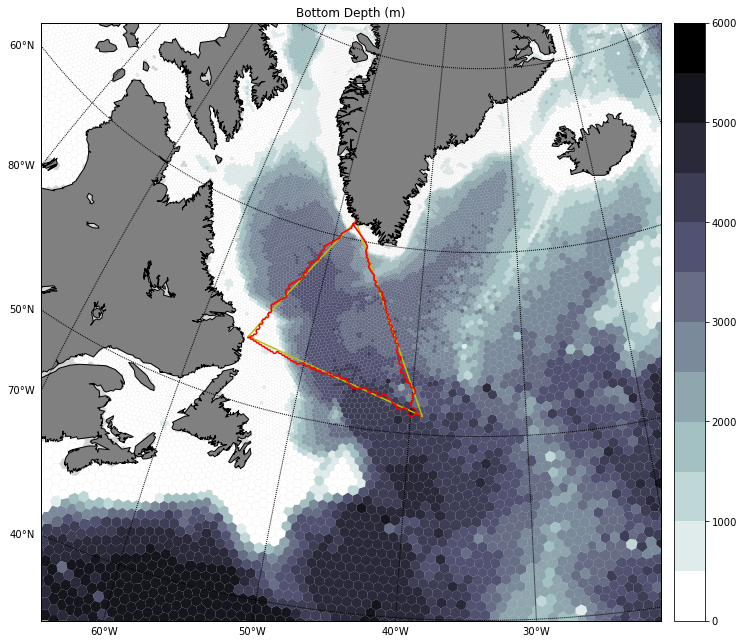

In [4]:
# set endpoints
lon_p0, lat_p0 = 304.5, 53.5
lon_p1, lat_p1 = 312, 61
lon_p2, lat_p2 = 321, 51
print('Endpoints:')
print('    P0: {:4.1f} {:4.1f}'.format(lon_p0, lat_p0))
print('    P1: {:4.1f} {:4.1f}'.format(lon_p1, lat_p1))
print('    P2: {:4.1f} {:4.1f}'.format(lon_p2, lat_p2))
# get the shortest path
path0 = mpasmesh.get_shortest_path(lon_p1, lat_p1, lon_p0, lat_p0, npoint_ref=5, debug_info=False) 
path1 = mpasmesh.get_shortest_path(lon_p2, lat_p2, lon_p1, lat_p1, npoint_ref=5, debug_info=False)
path2 = mpasmesh.get_shortest_path(lon_p2, lat_p2, lon_p0, lat_p0, npoint_ref=5, debug_info=False) 

fig = plt.figure(figsize=[12,11])
levels = np.linspace(0, 6000, 13)
out = mpasmesh.get_map('bottomDepth', name='Bottom Depth'). \
      plot(region='LabSea', ptype='pcolor', cmap='bone_r', levels=levels)
m = out[0]
# plot cross sections
m.drawgreatcircle(lon_p0, lat_p0, lon_p1, lat_p1, color='y')
m.drawgreatcircle(lon_p1, lat_p1, lon_p2, lat_p2, color='y')
m.drawgreatcircle(lon_p2, lat_p2, lon_p0, lat_p0, color='y')
# plot all edges
# mpasmesh.plot_edges(m, colors='lightgray')
# plot paths
path0.plot_edge(m, c='r')
path1.plot_edge(m, c='r')
path2.plot_edge(m, c='r')